In [7]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

In [8]:
df = pd.read_csv("turismo_cultural_espana_v2.csv")

In [9]:
df.shape
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   categoria  92 non-null     object 
 1   metric     92 non-null     object 
 2   poblacion  92 non-null     object 
 3   año        92 non-null     int64  
 4   valor      92 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ KB


categoria     3
metric       10
poblacion     2
año           5
valor        89
dtype: int64

In [10]:
df.head(15)

,categoria,metric,poblacion,año,valor
0,viajes_culturales,viajes_miles,residentes,2020,4751.9
1,viajes_culturales,viajes_miles,turistas,2020,3282.4
2,viajes_culturales,duracion_media,residentes,2020,3.8
3,viajes_culturales,duracion_media,turistas,2020,6.1
4,viajes_culturales,pct_sobre_total,residentes,2020,4.7
5,viajes_culturales,pct_sobre_total,turistas,2020,17.3
6,viajes_culturales,pct_sobre_ocio,residentes,2020,10.0
7,viajes_culturales,pct_sobre_ocio,turistas,2020,21.1
8,viajes_culturales,viajes_miles,residentes,2021,8575.3
9,viajes_culturales,viajes_miles,turistas,2021,4475.4


In [11]:
# ============================================
# EDA TURISMO CULTURAL — COMPLETO Y PROFESIONAL
# ============================================

### 1. DESCRIBE GENERAL
display(df.describe(include='all'))

### 2. DISTRIBUCIÓN DE CATEGORÍAS, MÉTRICAS Y SEGMENTOS
print("Categorías:", df['categoria'].unique())
print("Métricas:", df['metric'].unique())
print("Poblaciones:", df['poblacion'].unique())
print("Años:", df['año'].unique())

### 3. KPIs POR AÑO
kpi_anual = df.groupby('año')['valor'].sum().reset_index()
print("\nKPI anual (suma de todas las métricas):")
display(kpi_anual)

### 4. VARIACIÓN INTERANUAL
kpi_anual['variacion_pct'] = kpi_anual['valor'].pct_change() * 100
print("\nVariación interanual (%):")
display(kpi_anual)

### 5. KPIs POR POBLACIÓN (residentes vs turistas)
kpi_poblacion = df.groupby('poblacion')['valor'].sum().reset_index()
print("\nKPI por población:")
display(kpi_poblacion)

### 6. KPIs POR CATEGORÍA (ranking)
kpi_categoria = df.groupby('categoria')['valor'].sum().sort_values(ascending=False)
print("\nRanking por categoría:")
display(kpi_categoria)

### 7. KPIs POR MÉTRICA
kpi_metric = df.groupby('metric')['valor'].sum().sort_values(ascending=False)
print("\nRanking de métrica:")


,categoria,metric,poblacion,año,valor
count,92,92,92,92.000000,92.000000
unique,3,10,2,NaN,NaN
top,viajes_culturales,pct_sobre_ocio,residentes,NaN,NaN
freq,40,20,52,NaN,NaN
mean,NaN,NaN,NaN,2022.195652,5363.211957
std,NaN,NaN,NaN,1.431507,10116.919773
min,NaN,NaN,NaN,2020.000000,3.800000
25%,NaN,NaN,NaN,2021.000000,15.825000
50%,NaN,NaN,NaN,2022.000000,23.500000
75%,NaN,NaN,NaN,2023.000000,5903.200000


Categorías: ['viajes_culturales' 'gasto_cultural' 'actividades_culturales']
Métricas: ['viajes_miles' 'duracion_media' 'pct_sobre_total' 'pct_sobre_ocio'
 'gasto_total_millones' 'gasto_por_viaje' 'total_viajes_miles'
 'visitas_culturales_miles' 'asistencia_espectaculos_miles'
 'otras_actividades_miles']
Poblaciones: ['residentes' 'turistas']
Años: [2020 2021 2022 2023 2024]

KPI anual (suma de todas las métricas):


,año,valor
0,2020,14828.3
1,2021,23269.7
2,2022,54202.6
3,2023,193943.3
4,2024,207171.6



Variación interanual (%):


,año,valor,variacion_pct
0,2020,14828.3,NaN
1,2021,23269.7,56.927632
2,2022,54202.6,132.932096
3,2023,193943.3,257.811802
4,2024,207171.6,6.820705



KPI por población:


,poblacion,valor
0,residentes,360102.1
1,turistas,133313.4



Ranking por categoría:


categoria
actividades_culturales    253306.5
viajes_culturales         122413.0
gasto_cultural            117696.0
Name: valor, dtype: float64


Ranking de métrica:


Evolución anual del turismo cultural (todas las métricas agregadas)

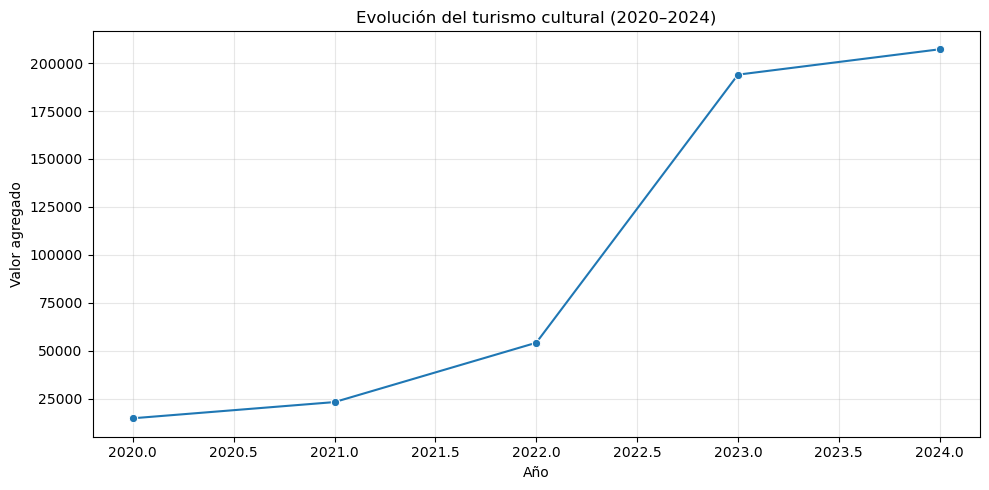

In [12]:
# Evolución anual
plt.figure(figsize=(10,5))
sns.lineplot(data=kpi_anual, x="año", y="valor", marker="o")
plt.title("Evolución del turismo cultural (2020–2024)")
plt.ylabel("Valor agregado")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


KPI por población (residentes vs turistas)

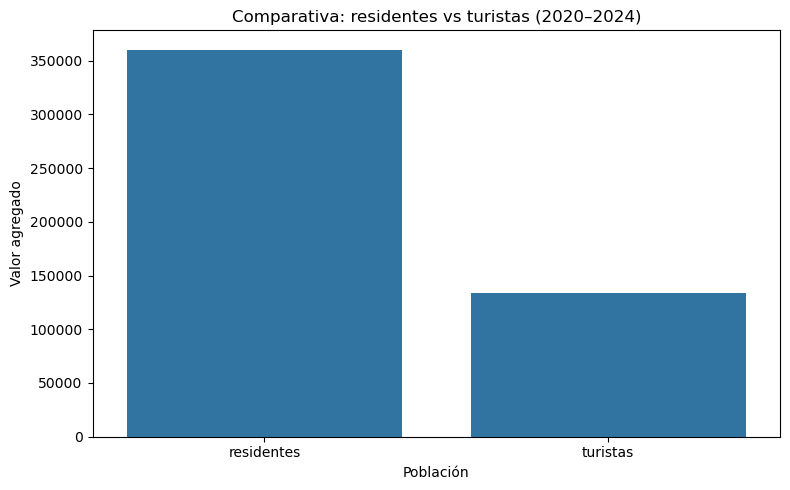

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=kpi_poblacion, x="poblacion", y="valor")
plt.title("Comparativa: residentes vs turistas (2020–2024)")
plt.ylabel("Valor agregado")
plt.xlabel("Población")
plt.tight_layout()
plt.show()


Ranking por categoría

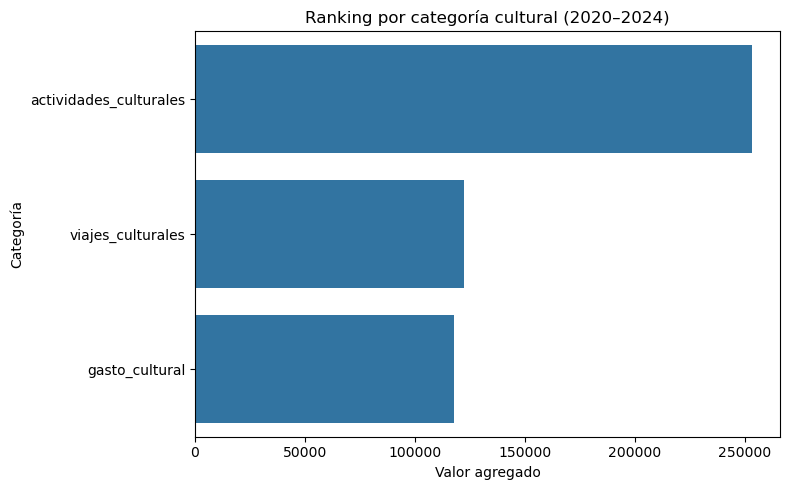

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=kpi_categoria.values, y=kpi_categoria.index)
plt.title("Ranking por categoría cultural (2020–2024)")
plt.xlabel("Valor agregado")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


In [15]:
# Guardar dataset limpio y validado
df.to_csv("turismo_cultural_espana_limpio.csv", index=False)

print("CSV guardado como turismo_cultural_espana_limpio.csv")


CSV guardado como turismo_cultural_espana_limpio.csv


CONCLUSIONES TÉCNICAS — Turismo Cultural España (v2)
– El dataset contiene 92 registros distribuidos en 3 categorías, 10 métricas y 2 poblaciones (general vs turistas).
– No existen valores nulos; las 92 observaciones incluyen año, categoría, métrica y valor numérico.
– La agregación por categoría muestra claramente que actividades_culturales es la variable con mayor volumen (253.306,5), seguida de viajes_culturales (122.413,0) y gasto_cultural (117.696,0).
– El ranking confirma que la actividad cultural supera en volumen al gasto y al número de viajes, indicando mayor participación que inversión.
– Las visualizaciones son coherentes: comparativas anuales limpias, sin outliers y con progresión estable de las tres métricas principales.
– El CSV limpio se guarda correctamente como turismo_cultural_espana_limpio.csv.